In [1]:
import os
import tensorflow as tf

os.environ['TFHUB_MODEL_LOAD_FORMAT']='COMPRESSED'

In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [3]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor) > 3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [4]:
content_path = '../images/content/content_lion.jpg'
style_path = '../images/style/TheRoneVanGogh.jpg'

In [5]:
def load_img(path_to_img):
    max_dim = 512
    img = tf.io.read_file(path_to_img)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)

    shape = tf.cast(tf.shape(img)[:-1], tf.float32)
    long_dim = max(shape)
    scale = max_dim/long_dim

    new_shape = tf.cast(shape*scale, tf.int32)

    img = tf.image.resize(img, new_shape)
    img = img[tf.newaxis, :]
    return img

In [6]:
def imshow(image, title=None):
    if(len(image.shape)) > 3 :
        image = tf.squeeze(image, axis=0)

    plt.imshow(image)
    if title:
        plt.title(title)

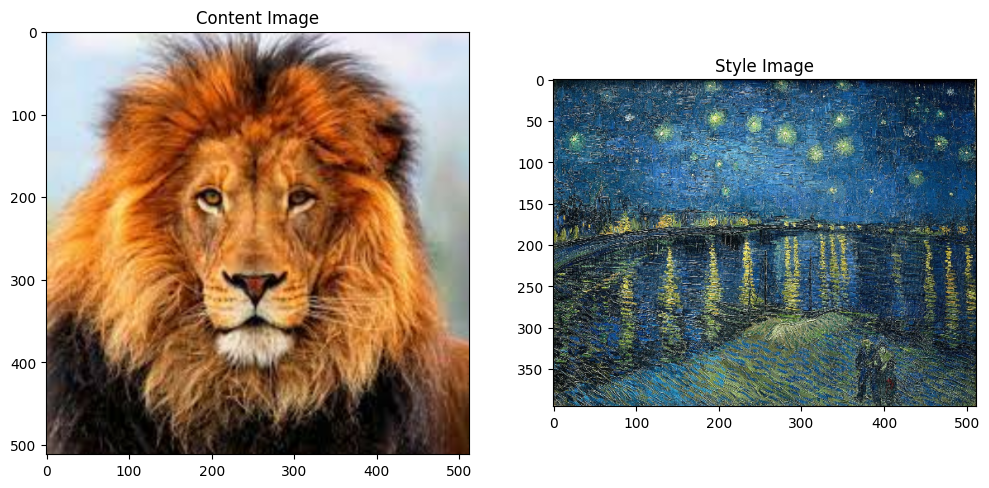

In [7]:
content_img = load_img(content_path)
style_img = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_img, "Content Image")

plt.subplot(1, 2, 2)
imshow(style_img, "Style Image")

In [8]:
import tensorflow_hub as hub
hub_model = tf.saved_model.load('../models/')

In [9]:
stylized_img = hub_model(tf.constant(content_img), tf.constant(style_img))[0]
stylized_img = tensor_to_image(stylized_img)

In [10]:
print(type(stylized_img))

<class 'PIL.Image.Image'>


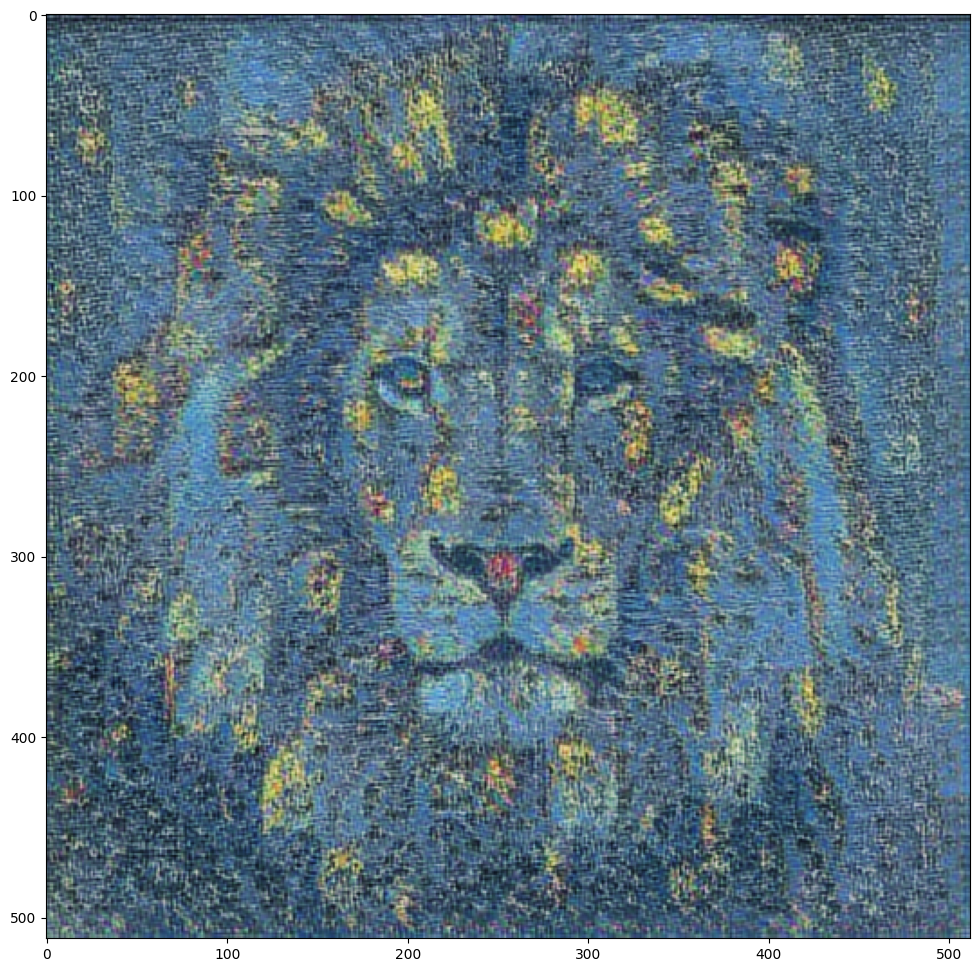

In [11]:
plt.imshow(stylized_img)